In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('/ihesp/shared/xiliang/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.nday1.EVAP_F.033801_051212.nc')

FileNotFoundError: [Errno 2] No such file or directory: b'/ihesp/shared/xiliang/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.nday1.EVAP_F.033801_051212.nc'

In [3]:
plotvar3 = data.variables['EVAP_F']

In [4]:
pl = plotvar3[:,224:343,600:1400]

In [5]:
plot1 = np.nanmean(pl, axis = 1)
aveplotnew = np.nanmean(plot1,axis=1)

In [15]:
new = aveplotnew[:1956]

In [22]:
d3 = new.reshape(163,12)

In [23]:
d3mean = np.nanmean(d3,axis=1)

In [27]:
dd = np.zeros((7))

In [30]:
dd[dd==0]=np.nan

In [31]:
dd

array([nan, nan, nan, nan, nan, nan, nan])

In [11]:
ww2 = np.convolve(lal, np.ones((60,))/60, mode='valid')

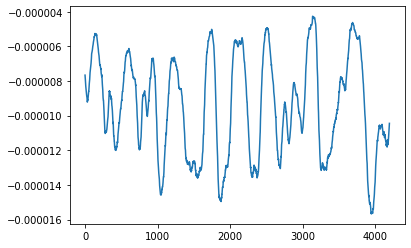

In [12]:
plt.plot(ww2)

In [2]:
b2= np.load(file="EVA330-2.npy")

In [3]:
b2.shape

(2160,)

In [4]:
d2 = b2.reshape(180,12)

In [5]:
d2mean = np.nanmean(d2,axis=1)

In [6]:
2160/12

180.0

In [7]:
lal = np.hstack((d2mean,dd))

NameError: name 'dd' is not defined

In [ ]:
lal2 = np.hstack((lal,d3mean))

In [8]:
lal2.shape

NameError: name 'lal2' is not defined

In [9]:
plt.plot(lal2)

NameError: name 'lal2' is not defined

In [11]:
lal2 = np.loadtxt("dmeanEvaporation.out")

In [12]:
mean = np.nanmean(lal2)

In [13]:
mean

-9.405568434607519e-06

In [14]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


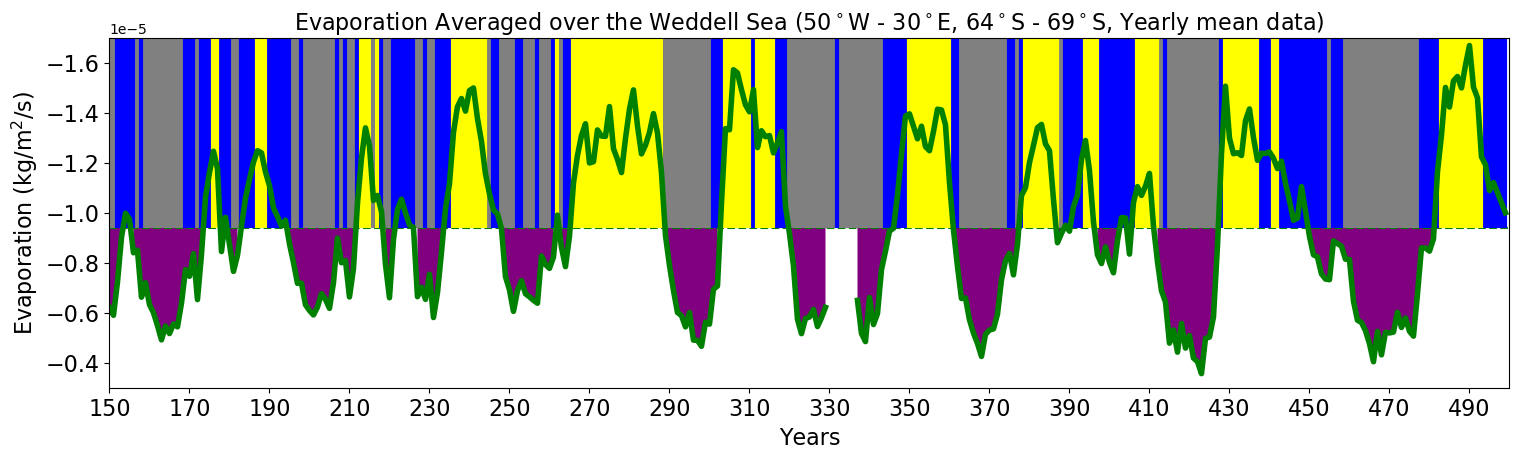

In [15]:
t = np.arange(0,350,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(lal2,'green',linewidth=4)
ax0.fill_between(t,mean,lal2,where=lal2 > mean,facecolor='purple', alpha=1)
plt.hlines(mean, 0, 350, colors = "green",linestyles = "dashed")
plt.vlines(noxx, mean, -0.00002,colors = "grey",linewidth=3)
plt.vlines(mrpxx, mean, -0.00002, colors = "blue",linewidth=3)
plt.vlines(wspxx, mean, -0.00002, colors = "yellow",linewidth=3)
#plt.axhspan(std,0.000005,facecolor='yellow', alpha=1)
#plt.axhspan(-std,std,facecolor='lightblue', alpha=1)
#plt.axhspan(-0.000003,-std,facecolor='lightgreen', alpha=1)
#plt.xticks(range(0,3720,240), ['150','170',\
                            #'190','210','230', '250', '270','290','310','330'],**my_font)
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
#plt.yticks(np.arange(-0.6,0.6,0.2), ['-0.6', '-0.4', '-0.2', '0','0.2','0.4','0.6'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Evaporation (kg/m$^2$/s)',**my_font)
plt.axis("tight")
ax0.set(ylim=(-0.000003, -0.000017),xlim=(0, 350))
ax = plt.gca()
ax.yaxis.get_major_formatter().set_powerlimits((0,1))
ax0.set_title('Evaporation Averaged over the Weddell Sea (50$^\circ$W - 30$^\circ$E, 64$^\circ$S - 69$^\circ$S, Yearly mean data)',**my_font)
plt.savefig("Evaporation.png",bbox_inches='tight',dpi=fig.dpi)

In [59]:
np.savetxt('dmeanEvaporation.npy', lal2)

In [2]:
lal2 = np.loadtxt("dmeanEvaporation.out")

In [7]:
pre = np.loadtxt("ddd.out")

In [8]:
fin = lal2 + pre

In [9]:
finmean = np.nanmean(fin)

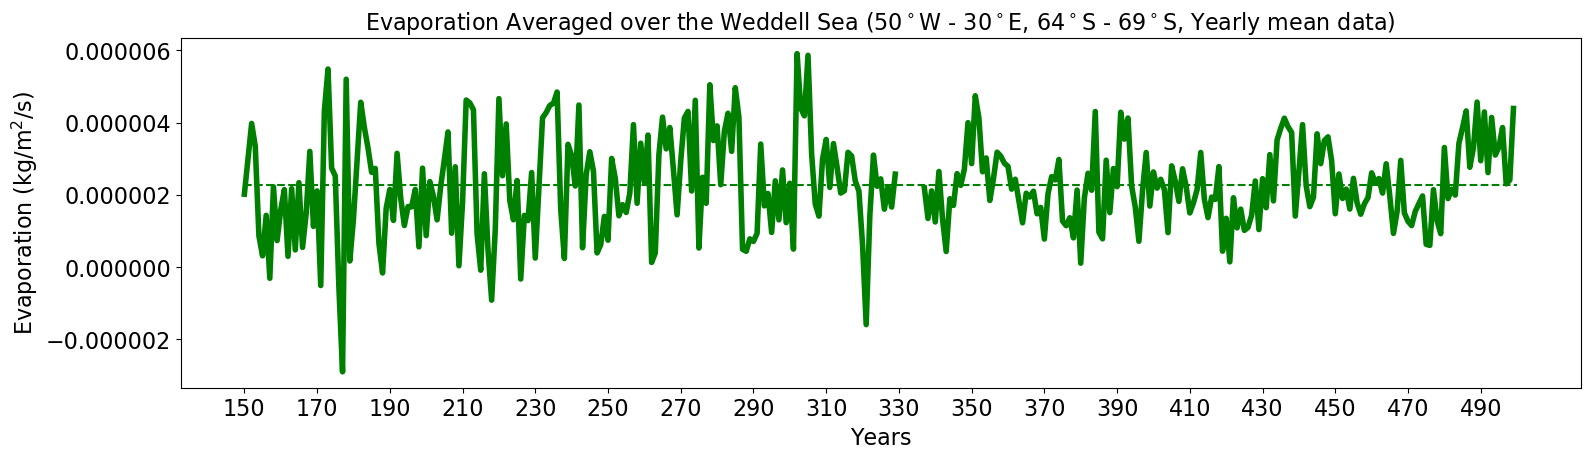

In [10]:
t = np.arange(0,350,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(fin,'green',linewidth=4)
#ax0.fill_between(t,fin,finmean,where=finmean > mean,facecolor='purple', alpha=1)
plt.hlines(finmean, 0, 350, colors = "green",linestyles = "dashed")
#plt.vlines(noxxx, mean, 0.00002, colors = "grey")
#plt.vlines(mrpxxx, mean, 0.00002, colors = "blue")
#plt.vlines(xxx, mean, 0.00002, colors = "yellow")
#plt.axhspan(std,0.000005,facecolor='yellow', alpha=1)
#plt.axhspan(-std,std,facecolor='lightblue', alpha=1)
#plt.axhspan(-0.000003,-std,facecolor='lightgreen', alpha=1)
#plt.xticks(range(0,3720,240), ['150','170',\
                            #'190','210','230', '250', '270','290','310','330'],**my_font)
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
#plt.yticks(np.arange(-0.6,0.6,0.2), ['-0.6', '-0.4', '-0.2', '0','0.2','0.4','0.6'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Evaporation (kg/m$^2$/s)',**my_font)
plt.axis("tight")
#ax0.set(ylim=(-0.000003, -0.000017),xlim=(0, 350))
ax0.set_title('Evaporation Averaged over the Weddell Sea (50$^\circ$W - 30$^\circ$E, 64$^\circ$S - 69$^\circ$S, Yearly mean data)',**my_font)
plt.savefig("E.png",bbox_inches='tight',dpi=fig.dpi)

In [11]:
ww2 = np.convolve(fin, np.ones((5,))/5, mode='valid')
mean = np.nanmean(ww2)

In [12]:
mean

2.255510344002178e-06

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


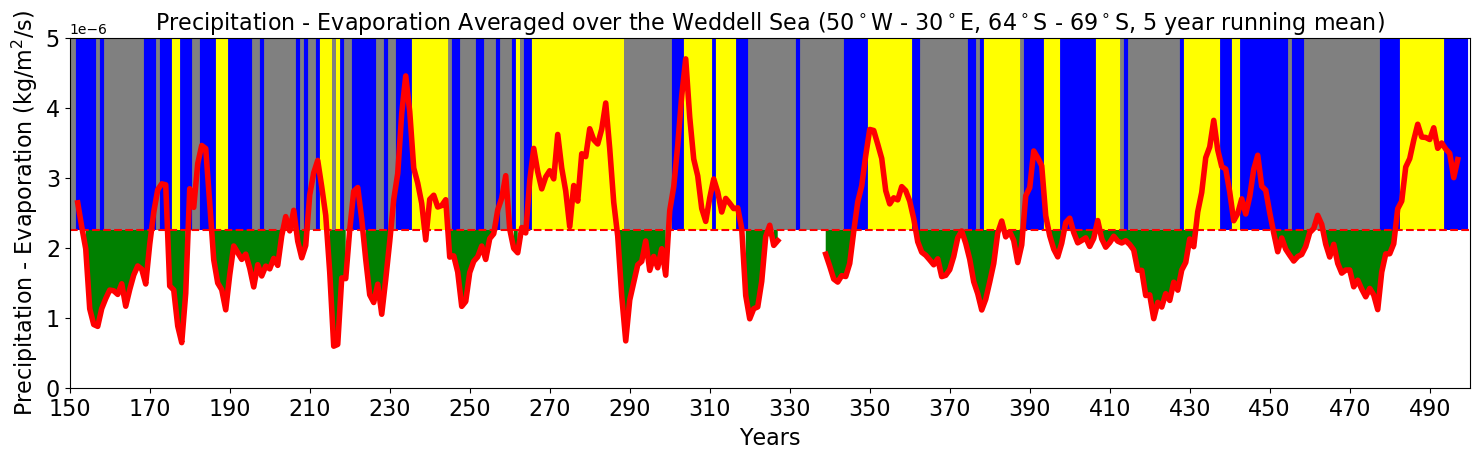

In [20]:
t = np.arange(2,348,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
plt.vlines(noxx, mean, 0.000005,colors = "grey",linewidth=3)
plt.vlines(mrpxx, mean, 0.000005, colors = "blue",linewidth=3)
plt.vlines(wspxx, mean, 0.000005, colors = "yellow",linewidth=3)
ax0.plot(t,ww2,'red',linewidth=4)
ax0.fill_between(t,ww2,mean,where=mean > ww2,facecolor='green', alpha=1)
plt.hlines(mean, 0, 350, colors = "red",linestyles = "dashed")
#plt.vlines(noxx, 0, 0.000005,colors = "grey",linewidth=3)
#plt.vlines(mrpxx, 0, 0.000005, colors = "blue",linewidth=3)
#plt.vlines(wspxx, 0, 0.000005, colors = "yellow",linewidth=3)
#plt.axhspan(std,0.000005,facecolor='yellow', alpha=1)
#plt.axhspan(-std,std,facecolor='lightblue', alpha=1)
#plt.axhspan(-0.000003,-std,facecolor='lightgreen', alpha=1)
#plt.xticks(range(0,3720,240), ['150','170',\
                            #'190','210','230', '250', '270','290','310','330'],**my_font)
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
#plt.yticks(np.arange(-0.6,0.6,0.2), ['-0.6', '-0.4', '-0.2', '0','0.2','0.4','0.6'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Precipitation - Evaporation (kg/m$^2$/s)',**my_font)
plt.axis("tight")
ax0.set(ylim=(0, 0.000005),xlim=(0, 350))
ax = plt.gca()
ax.yaxis.get_major_formatter().set_powerlimits((0,1))
ax0.set_title('Precipitation - Evaporation Averaged over the Weddell Sea (50$^\circ$W - 30$^\circ$E, 64$^\circ$S - 69$^\circ$S, 5 year running mean)',**my_font)
plt.savefig("Precipitation - Evaporation",bbox_inches='tight',dpi=fig.dpi)

In [21]:
np.savetxt('p-e.out', ww2)